## GOOGLE EDUCATION APP CLASSIFICATION 

1. Import necessary files <br/>
2. Read the csv file <br/>
3. List the various fields in our dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Read the csv file into dataframe df
df = pd.read_csv("train1.csv")
print(df.shape)

(124, 21)


In [3]:
#List the fields in our dataframe
print(df.dtypes)

appname                  object
updated                  object
file_size                object
download                 object
version                  object
compatibility            object
price                    object
rating_value            float64
star_total               object
editors_choice           object
offered_by               object
description              object
Language Learning         int64
Computer Engineering      int64
General Learning          int64
Exam Preparation          int64
Maths                     int64
Art                       int64
other engineering         int64
Educational Gaming        int64
misc                      int64
dtype: object


Hence we have a dataset consistly of 124 samples. Each sample contains 21 fields. <br/>

# Separate the comment field data and outcome labels

In [4]:
comment = df['description']
print(comment.head())
comment = comment.as_matrix()

0    Learn Spanish, French, German, Italian, Russia...
1    Speak a new language with confidence. Learn Sp...
2    Start speaking a new language on day one! Try ...
3    This app contains Implementation (full working...
4    Learn on the go with the Coursera App for Andr...
Name: description, dtype: object


In [5]:
label = df[['Language Learning', 'Computer Engineering' , 'General Learning' , 'Exam Preparation' , 'Maths' , 'Art', 'other engineering', 'Educational Gaming', 'misc']]
print(label.head())
label = label.as_matrix()

   Language Learning  Computer Engineering  General Learning  \
0                  1                     0                 0   
1                  1                     0                 0   
2                  1                     0                 0   
3                  0                     1                 0   
4                  1                     1                 1   

   Exam Preparation  Maths  Art  other engineering  Educational Gaming  misc  
0                 0      0    0                  0                   0     0  
1                 0      0    0                  0                   0     0  
2                 0      0    0                  0                   0     0  
3                 0      0    0                  0                   0     0  
4                 0      0    1                  1                   0     0  


In [6]:
# Only for testing dataset for Nan values
# count= 0
# for ix in range(label.shape[0]):
#     if(label[ix][8]!=0. and label[ix][8]!=1.):
#         print(ix)
#         print (comment[ix])
#         count+=1
#         print(label[ix])
# print(count)

### Let us find out the frequency of occurence of multilabelled data 
- ct1 counts samples having atleast one label
- ct2 counts samples having 2 or more than 2 labels

In [7]:
ct1,ct2 = 0,0
for i in range(label.shape[0]):
    ct = np.count_nonzero(label[i])
    if ct :
        ct1 = ct1+1
    if ct>1 :
        ct2 = ct2+1
print(ct1)
print(ct2)

124
27


## Data Visualisations
### Let us analyse the no. of comments having lengths varying from 0 to 1200

average length of comment: 1426.919


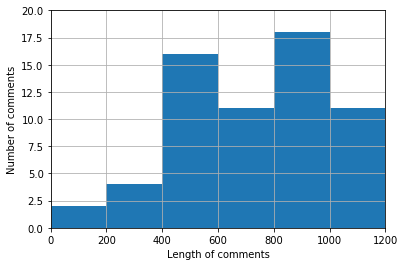

In [8]:
x = [len(comment[i]) for i in range(comment.shape[0])]

print('average length of comment: {:.3f}'.format(sum(x)/len(x)) )
bins = [1,200,400,600,800,1000,1200]
plt.hist(x, bins=bins)
plt.xlabel('Length of comments')
plt.ylabel('Number of comments')       
plt.axis([0, 1200, 0, 20])
plt.grid(True)
plt.show()

### Number of comments classified as toxic,severe_toxic,....etc depending on their lengths

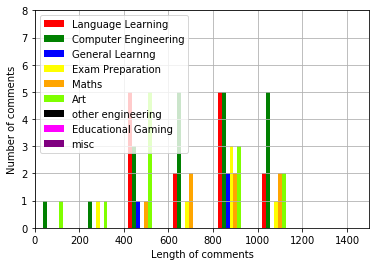

In [9]:
y = np.zeros(label.shape)
for ix in range(comment.shape[0]):
    l = len(comment[ix])
    if label[ix][0] :
        y[ix][0] = l
    if label[ix][1] :
        y[ix][1] = l
    if label[ix][2] :
        y[ix][2] = l
    if label[ix][3] :
        y[ix][3] = l
    if label[ix][4] :
        y[ix][4] = l
    if label[ix][5] :
        y[ix][5] = l

labelsplt = ['Language Learning', 'Computer Engineering' , 'General Learnng' , 'Exam Preparation' , 'Maths' , 'Art', 'other engineering', 'Educational Gaming', 'misc']
color = ['red','green','blue','yellow','orange','chartreuse','black','magenta','purple']        
plt.hist(y,bins = bins,label = labelsplt,color = color)
plt.axis([0, 1500, 0, 8])
plt.xlabel('Length of comments')
plt.ylabel('Number of comments') 
plt.legend()
plt.grid(True)
plt.show()

In [10]:
# creating a separate variable for app description (comments) and labels (classifiers)
comments = []
labels = []

for ix in range(comment.shape[0]):
    comments.append(comment[ix])
    labels.append(label[ix])

In [11]:
labels = np.asarray(labels)

In [12]:
print (labels[0])

[1 0 0 0 0 0 0 0 0]


In [13]:
print(len(comments))

124


# Preprocessing 
Preprocessing involved the following steps, but these will be performed in a slightly different manner:
- Removing Punctuations and other special characters
- Splitting the comments into individual words
- Removing Stop Words
- Stemming and Lemmatising
- Applying Count Vectoriser
- Splitting dataset into Training and Testing

## Preparing a string containing all punctuations to be removed
The string library contains punctuation characters. This is imported and all numbers are appended to this string. Also, we can notice that our comment_text field contains strings such as won't, didn't, etc which contain apostrophe character('). To prevent these words from being converted to wont/didnt, the character ' represented as \' in escape sequence notation is replaced by empty character in the punctuation string. <br/>

**maketrans()** returns a translation table that maps each character in the punctuation_edit into the character at the same position in the outtab string i.e. it replaces every character in the removal list with a space, since outtab contains a string with spaces.

In [14]:
import string
print(string.punctuation)
punctuation_edit = string.punctuation.replace('\'','') +"0123456789"
print (punctuation_edit)
outtab = "                                         "
trantab = str.maketrans(punctuation_edit, outtab)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
!"#$%&()*+,-./:;<=>?@[\]^_`{|}~0123456789


## Updating the list of stop words
**Stop words** are those words that are frequently used in both written and verbal communication and thereby do not have either a positive/negative impact on our statement.E.g. is, this, us,etc. <br/>
Single letter words if existing or created due to any preprocessing step do not convey any useful meaning and hence can be directly removed. Hence letters from b to z, will be added to the list of stop words imported directly.

In [15]:
from stop_words import get_stop_words
stop_words = get_stop_words('english')
stop_words.append('')

for x in range(ord('b'), ord('z')+1):
    stop_words.append(chr(x))

In [16]:
print (stop_words)

['a', 'about', 'above', 'after', 'again', 'against', 'all', 'am', 'an', 'and', 'any', 'are', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', "can't", 'cannot', 'could', "couldn't", 'did', "didn't", 'do', 'does', "doesn't", 'doing', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', "hadn't", 'has', "hasn't", 'have', "haven't", 'having', 'he', "he'd", "he'll", "he's", 'her', 'here', "here's", 'hers', 'herself', 'him', 'himself', 'his', 'how', "how's", 'i', "i'd", "i'll", "i'm", "i've", 'if', 'in', 'into', 'is', "isn't", 'it', "it's", 'its', 'itself', "let's", 'me', 'more', 'most', "mustn't", 'my', 'myself', 'no', 'nor', 'not', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'ought', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 'same', "shan't", 'she', "she'd", "she'll", "she's", 'should', "shouldn't", 'so', 'some', 'such', 'than', 'that', "that's", 'the', 'their', 'theirs', 'them', 'themselves', 't

## Stemming and Lemmatizing
**Stemming** is the process of converting inflected/derived words to their word stem or the root form. Basically, a large number of similar origin words are converted to the same word.E.g. words like "stems", "stemmer", "stemming", "stemmed" as based on "stem". This helps in achieving the training process with a better accuracy.<br/>
**Lemmatizing** is the process of grouping together the inflected forms of a word so they can be analysed as a single item. This is quite similar to stemming in its working but differs since it depends on correctly identifying the intended part of speech and meaning of a word in a sentence, as well as within the larger context surrounding that sentence, such as neighboring sentences or even an entire document.<br/>
The **wordnet library in nltk** will be used for this purpose. Stemmer and Lemmatizer are also imported from nltk.


In [17]:
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer

In [18]:
#create objects for stemmer and lemmatizer
lemmatiser = WordNetLemmatizer()
stemmer = PorterStemmer()
#download words from wordnet library
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /Users/paavini/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### We can now, loop once through all the comments applying :
- punctuation removal
- splitting the words by space
- applying stemmer and lemmatizer
- recombining the words again for further processing

In [19]:
for i in range(len(comments)):
    comments[i] = comments[i].lower().translate(trantab)
    l = []
    for word in comments[i].split():
        l.append(stemmer.stem(lemmatiser.lemmatize(word,pos="v")))
    comments[i] = " ".join(l)

## Applying Count Vectorizer
Here we can finally convert our comments into a matrix of token counts, which signifies the number of times it occurs.

In [20]:
#import required library
from sklearn.feature_extraction.text import CountVectorizer

#create object supplying our custom stop words
count_vector = CountVectorizer(stop_words=stop_words)
#fitting it to converts comments into bag of words format
tf = count_vector.fit_transform(comments).toarray()

In [21]:
# print(count_vector.get_feature_names())
print(tf.shape)

(124, 3095)


Hence from its shape we can imply that after all preprocessing we have a list of 52905 words in total.
## Splitting dataset into training and testing
- Since the system was going out of memory using train_test_split, I had jumbled all the indexes in the beginning itself. 
- The shuffle function defined here performs the task of assigning first 2/3rd values to train and remaining 1/3rd values to the test set.

In [22]:
from sklearn.model_selection import train_test_split
def shuffle(matrix, target, test_proportion):
    ratio = int(matrix.shape[0]/test_proportion)
    X_train = matrix[ratio:,:]
    X_test =  matrix[:ratio,:]
    Y_train = target[ratio:,:]
    Y_test =  target[:ratio,:]
    return X_train, X_test, Y_train, Y_test

# X_train, X_test, Y_train, Y_test = shuffle(tf, labels,5)
X_train, X_test, Y_train, Y_test = train_test_split(tf, labels, test_size=0.25, random_state=42)

print(X_test.shape)
print(X_train.shape)

(31, 3095)
(93, 3095)


# Implementation :
### Let us define all the evaluation metrics

In [23]:
from sklearn.metrics import hamming_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss

def evaluate_score(Y_test,predict): 
    loss = hamming_loss(Y_test,predict)
    print("Hamming_loss : {}".format(loss*100))
    accuracy = accuracy_score(Y_test,predict)
    print("Accuracy : {}".format(accuracy*100))
    try : 
        loss = log_loss(Y_test,predict)
    except :
        loss = log_loss(Y_test,predict.toarray())
    print("Log_loss : {}".format(loss))

## Starting with the First Model -
### Problem Transformation Methods :
**These include the Binary Relevance, Label Powerset and Classifier Chain methods. Implementations of these methods is available in the scikit-multilearn library. **
- I will be implementing the most basic method,which is the **Binary Relevance** method from scratch. It does not take into account the interdependence of labels and basically creates a separate classifier for each of the labels.
- Scikit-multilearn library's classifier will also be imported and tested with different classifiers to observe if it gives similar results.

### 1. Binary Relevance (BR) Method with MultinomialNB classifiers (from scratch)

In [24]:
from sklearn.naive_bayes import MultinomialNB

In [25]:
print (Y_train[0])

[0 0 0 0 0 1 0 0 0]


In [26]:
# clf will be the list of the classifiers for all the 6 labels
# each classifier is fit with the training data and corresponding classifier
clf = []
for ix in range(9):
    clf.append(MultinomialNB())
    clf[ix].fit(X_train,Y_train[:,ix])

In [27]:
# predict list contains the predictions, it is transposed later to get the proper shape
predict = []
for ix in range(9):
    predict.append(clf[ix].predict(X_test))

predict = np.asarray(np.transpose(predict))
print(predict.shape)

(31, 9)


In [28]:
# calculate results
evaluate_score(Y_test,predict)

Hamming_loss : 12.186379928315413
Accuracy : 51.61290322580645
Log_loss : 8.632300984363441


### 2. BR Method with Multinomial classifier (from scikit-multilearn)

In [30]:
#create and fit classifier
from skmultilearn.problem_transform import BinaryRelevance
classifier = BinaryRelevance(classifier = MultinomialNB(), require_dense = [False, True])
classifier.fit(X_train, Y_train)

BinaryRelevance(classifier=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True),
        require_dense=[False, True])

In [31]:
#predictions
predictions = classifier.predict(X_test)

In [32]:
#calculate scores
evaluate_score(Y_test,predictions)

Hamming_loss : 12.186379928315413
Accuracy : 51.61290322580645
Log_loss : 8.632300984363441


### 3. BR Method with GausseanNB classifier (from scratch)

In [33]:
from sklearn.naive_bayes import GaussianNB
#create and fit classifiers
clf = []
for ix in range(9):
    clf.append(GaussianNB())
    clf[ix].fit(X_train,Y_train[:,ix])

In [34]:
#predictions
predict = []
for ix in range(9):
    predict.append(clf[ix].predict(X_test))

In [35]:
#calculate scores
predict = np.asarray(np.transpose(predict))
evaluate_score(Y_test,predict)

Hamming_loss : 11.11111111111111
Accuracy : 29.03225806451613
Log_loss : 6.299449825496276


### 4. Classifier chain with MultinomialNB classifier (from scikit-multilearn)

In [36]:
#create and fit classifier
from skmultilearn.problem_transform import ClassifierChain
classifier = ClassifierChain(MultinomialNB())
classifier.fit(X_train, Y_train)

ClassifierChain(classifier=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True),
        require_dense=[True, True])

In [37]:
#predictions
predictions = classifier.predict(X_test)

In [38]:
#calculate scores
evaluate_score(Y_test,predictions)

Hamming_loss : 11.469534050179211
Accuracy : 51.61290322580645
Log_loss : 8.61542201198394


### 5. Label Powerset with MultinomialNB classifier (from scikit-multilearn)

In [39]:
#create and fit classifier
from skmultilearn.problem_transform import LabelPowerset
classifier = LabelPowerset(MultinomialNB())
classifier.fit(X_train, Y_train)

LabelPowerset(classifier=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True),
       require_dense=[True, True])

In [40]:
#predictions
predictions = classifier.predict(X_test)

In [41]:
#calculate scores
evaluate_score(Y_test,predictions)

Hamming_loss : 9.31899641577061
Accuracy : 61.29032258064516
Log_loss : 18.998418005893868


## Adaptation Algorithms
### 6. MLkNN  with k=2 (from scikit-multilearn)
This is the adapted multi-label version of K Nearest Neighbours. Its implementation is available in the multilearn library.

In [52]:
#create and fit classifier
from skmultilearn.adapt import MLkNN
classifier = MLkNN(k=5)
classifier.fit(X_train, Y_train)

MLkNN(ignore_first_neighbours=0, k=5, s=1.0)

In [53]:
#predictions
predictions = classifier.predict(X_test)

In [54]:
#calculate scores
evaluate_score(Y_test,predictions)

Hamming_loss : 11.469534050179211
Accuracy : 35.483870967741936
Log_loss : 11.344114234571348


### 7. BP-MLL Neural Networks (from scratch)

In [55]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

In [56]:
#define model architecture
model = Sequential()
model.add(Dense(20, activation='relu', input_dim = X_train.shape[1]))
model.add(Dropout(0.3))
model.add(Dense(9, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 20)                61920     
_________________________________________________________________
dropout_1 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 9)                 189       
Total params: 62,109
Trainable params: 62,109
Non-trainable params: 0
_________________________________________________________________


In [57]:
#compile model with all parameters set
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [58]:
#Fit using check pointer
from keras.callbacks import ModelCheckpoint  

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.myneural.h5py', 
                               verbose=1, save_best_only=True)
model.fit(X_train, Y_train, epochs=10, batch_size=32)

Epoch 1/10
93/93 [==============================] - 0s 3ms/step - loss: 2.8532 - acc: 0.1398
Epoch 2/10
93/93 [==============================] - 0s 151us/step - loss: 2.5047 - acc: 0.3226
Epoch 3/10
93/93 [==============================] - 0s 173us/step - loss: 2.3101 - acc: 0.4731
Epoch 4/10
93/93 [==============================] - 0s 183us/step - loss: 2.0817 - acc: 0.5699
Epoch 5/10
93/93 [==============================] - 0s 170us/step - loss: 1.8782 - acc: 0.6774
Epoch 6/10
93/93 [==============================] - 0s 161us/step - loss: 1.8952 - acc: 0.6344
Epoch 7/10
93/93 [==============================] - 0s 161us/step - loss: 1.6681 - acc: 0.7849
Epoch 8/10
93/93 [==============================] - 0s 160us/step - loss: 1.6252 - acc: 0.7527
Epoch 9/10
93/93 [==============================] - 0s 144us/step - loss: 1.5235 - acc: 0.7527
Epoch 10/10
93/93 [==============================] - 0s 165us/step - loss: 1.4325 - acc: 0.7634


In [59]:
#predictions
predict = model.predict(X_test)

In [60]:
print(predict[0])

[0.04141634 0.06546991 0.01012321 0.12140076 0.17862456 0.14328544
 0.09208215 0.26459968 0.08299797]


**Since the results returned by the model are in the form of probabilities, they have to be explicitly converted to either 0/1 using the round function. This is because the hamming_loss and accuracy_score cannot work on these values directly. However, log loss can compute loss directly without modifying the values.**

In [61]:
#calculate score
loss = log_loss(Y_test,predict)
print("Log_loss : {}".format(loss))
predict = np.round(predict)
loss = hamming_loss(Y_test,predict)
print("Hamming_loss : {}".format(loss*100))
accuracy = accuracy_score(Y_test,predict)
print("Accuracy : {}".format(accuracy*100))

Log_loss : 2.048833615356876
Hamming_loss : 13.620071684587815
Accuracy : 12.903225806451612


## Let us try improving the BP-MLL model (Refining)


In [62]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras import optimizers

#define parameters for using in param grid
nodes = [16, 32] # number of nodes in the hidden layer
lrs = [0.001, 0.002, 0.003] # learning rate, default = 0.001
epochs = [10,20]
batch_size = 64

In [63]:
def create_model(nodes=10,lr=0.001):
    model = Sequential()
    model.add(Dense(nodes, activation='relu', input_dim = X_train.shape[1]))
    model.add(Dropout(0.3))
    model.add(Dense(9, activation='softmax'))
    opt = optimizers.RMSprop(lr=lr)
    model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model)

In [64]:
#start fitting process
param_grid = dict(epochs=epochs,nodes=nodes, lr=lrs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1,refit=True,verbose=2)
grid_result = grid.fit(X_train, Y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] epochs=10, lr=0.001, nodes=16 ...................................
Epoch 1/10
62/62 [==============================] - 0s 6ms/step - loss: 2.8156 - acc: 0.1774
Epoch 2/10
62/62 [==============================] - 0s 148us/step - loss: 2.4316 - acc: 0.2742
Epoch 3/10
62/62 [==============================] - 0s 171us/step - loss: 2.1968 - acc: 0.5000
Epoch 4/10
62/62 [==============================] - 0s 162us/step - loss: 2.0765 - acc: 0.5968
Epoch 5/10
62/62 [==============================] - 0s 164us/step - loss: 1.9246 - acc: 0.6452
Epoch 6/10
62/62 [==============================] - 0s 182us/step - loss: 1.7802 - acc: 0.6613
Epoch 7/10
62/62 [==============================] - 0s 154us/step - loss: 1.6844 - acc: 0.7258
Epoch 8/10
62/62 [==============================] - 0s 190us/step - loss: 1.5620 - acc: 0.8065
Epoch 9/10
62/62 [==============================] - 0s 196us/step - loss: 1.5291 - acc: 0.7419
Epoch 10/10
62/

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


Epoch 1/10
62/62 [==============================] - 0s 6ms/step - loss: 3.0977 - acc: 0.0806
Epoch 2/10
62/62 [==============================] - 0s 151us/step - loss: 2.7317 - acc: 0.2742
Epoch 3/10
62/62 [==============================] - 0s 185us/step - loss: 2.5161 - acc: 0.3387
Epoch 4/10
62/62 [==============================] - 0s 178us/step - loss: 2.2944 - acc: 0.4677
Epoch 5/10
62/62 [==============================] - 0s 170us/step - loss: 2.1759 - acc: 0.5323
Epoch 6/10
62/62 [==============================] - 0s 184us/step - loss: 2.0458 - acc: 0.5645
Epoch 7/10
62/62 [==============================] - 0s 201us/step - loss: 1.9493 - acc: 0.6129
Epoch 8/10
62/62 [==============================] - 0s 158us/step - loss: 1.9330 - acc: 0.5806
Epoch 9/10
62/62 [==============================] - 0s 164us/step - loss: 1.8695 - acc: 0.6613
Epoch 10/10
62/62 [==============================] - 0s 96us/step
[CV] .................... epochs=10, lr=0.001, nodes=16, total=   1.2s
[CV] epoch

62/62 [==============================] - 0s 78us/step
[CV] .................... epochs=10, lr=0.002, nodes=16, total=   2.0s
[CV] epochs=10, lr=0.002, nodes=16 ...................................
Epoch 1/10
62/62 [==============================] - 1s 9ms/step - loss: 3.0735 - acc: 0.0968
Epoch 2/10
62/62 [==============================] - 0s 155us/step - loss: 2.3322 - acc: 0.4194
Epoch 3/10
62/62 [==============================] - 0s 151us/step - loss: 2.0783 - acc: 0.6290
Epoch 4/10
62/62 [==============================] - 0s 213us/step - loss: 1.7985 - acc: 0.6129
Epoch 5/10
62/62 [==============================] - 0s 188us/step - loss: 1.7331 - acc: 0.6774
Epoch 6/10
62/62 [==============================] - 0s 170us/step - loss: 1.5673 - acc: 0.7742
Epoch 7/10
62/62 [==============================] - 0s 160us/step - loss: 1.4043 - acc: 0.8226
Epoch 8/10
62/62 [==============================] - 0s 195us/step - loss: 1.4939 - acc: 0.7419
Epoch 9/10
62/62 [============================

62/62 [==============================] - 0s 160us/step - loss: 1.2346 - acc: 0.7419
Epoch 10/10
62/62 [==============================] - 0s 86us/step
[CV] .................... epochs=10, lr=0.003, nodes=16, total=   1.5s
[CV] epochs=10, lr=0.003, nodes=32 ...................................
Epoch 1/10
62/62 [==============================] - 1s 12ms/step - loss: 2.6763 - acc: 0.2581
Epoch 2/10
62/62 [==============================] - 0s 206us/step - loss: 1.7943 - acc: 0.6452
Epoch 3/10
62/62 [==============================] - 0s 189us/step - loss: 1.3349 - acc: 0.8387
Epoch 4/10
62/62 [==============================] - 0s 202us/step - loss: 1.1084 - acc: 0.8226
Epoch 5/10
62/62 [==============================] - 0s 218us/step - loss: 0.9498 - acc: 0.9194
Epoch 6/10
62/62 [==============================] - 0s 212us/step - loss: 0.8252 - acc: 0.8387
Epoch 7/10
62/62 [==============================] - 0s 221us/step - loss: 0.7712 - acc: 0.9032
Epoch 8/10
62/62 [==========================

62/62 [==============================] - 0s 90us/step
[CV] .................... epochs=20, lr=0.001, nodes=16, total=   1.8s
[CV] epochs=20, lr=0.001, nodes=16 ...................................
Epoch 1/20
62/62 [==============================] - 1s 13ms/step - loss: 3.0237 - acc: 0.0968
Epoch 2/20
62/62 [==============================] - 0s 151us/step - loss: 2.5997 - acc: 0.3065
Epoch 3/20
62/62 [==============================] - 0s 173us/step - loss: 2.3416 - acc: 0.3871
Epoch 4/20
62/62 [==============================] - 0s 147us/step - loss: 2.2177 - acc: 0.5000
Epoch 5/20
62/62 [==============================] - 0s 186us/step - loss: 2.1076 - acc: 0.5806
Epoch 6/20
62/62 [==============================] - 0s 167us/step - loss: 2.0476 - acc: 0.5968
Epoch 7/20
62/62 [==============================] - 0s 167us/step - loss: 1.8815 - acc: 0.5968
Epoch 8/20
62/62 [==============================] - 0s 177us/step - loss: 1.8715 - acc: 0.6613
Epoch 9/20
62/62 [===========================

62/62 [==============================] - 0s 190us/step - loss: 0.9550 - acc: 0.8871
Epoch 17/20
62/62 [==============================] - 0s 251us/step - loss: 0.9478 - acc: 0.8387
Epoch 18/20
62/62 [==============================] - 0s 255us/step - loss: 0.8710 - acc: 0.8710
Epoch 19/20
62/62 [==============================] - 0s 341us/step - loss: 0.9742 - acc: 0.8548
Epoch 20/20
62/62 [==============================] - 0s 148us/step
[CV] .................... epochs=20, lr=0.001, nodes=32, total=   2.7s
[CV] epochs=20, lr=0.002, nodes=16 ...................................
Epoch 1/20
62/62 [==============================] - 1s 16ms/step - loss: 2.8451 - acc: 0.1613
Epoch 2/20
62/62 [==============================] - 0s 173us/step - loss: 2.3240 - acc: 0.4032
Epoch 3/20
62/62 [==============================] - 0s 167us/step - loss: 2.0314 - acc: 0.5968
Epoch 4/20
62/62 [==============================] - 0s 184us/step - loss: 1.7435 - acc: 0.6129
Epoch 5/20
62/62 [======================

62/62 [==============================] - 0s 205us/step - loss: 0.7467 - acc: 0.9194
Epoch 12/20
62/62 [==============================] - 0s 212us/step - loss: 0.7941 - acc: 0.8065
Epoch 13/20
62/62 [==============================] - 0s 220us/step - loss: 0.7012 - acc: 0.8871
Epoch 14/20
62/62 [==============================] - 0s 244us/step - loss: 0.6328 - acc: 0.9194
Epoch 15/20
62/62 [==============================] - 0s 227us/step - loss: 0.6951 - acc: 0.8548
Epoch 16/20
62/62 [==============================] - 0s 244us/step - loss: 0.6223 - acc: 0.8387
Epoch 17/20
62/62 [==============================] - 0s 246us/step - loss: 0.6816 - acc: 0.8710
Epoch 18/20
62/62 [==============================] - 0s 227us/step - loss: 0.6251 - acc: 0.8548
Epoch 19/20
62/62 [==============================] - 0s 223us/step - loss: 0.5840 - acc: 0.8871
Epoch 20/20
62/62 [==============================] - 0s 108us/step
[CV] .................... epochs=20, lr=0.002, nodes=32, total=   2.1s
[CV] epoch

62/62 [==============================] - 0s 230us/step - loss: 1.6065 - acc: 0.7581
Epoch 7/20
62/62 [==============================] - 0s 228us/step - loss: 1.4382 - acc: 0.7581
Epoch 8/20
62/62 [==============================] - 0s 221us/step - loss: 1.4867 - acc: 0.6774
Epoch 9/20
62/62 [==============================] - 0s 198us/step - loss: 1.3493 - acc: 0.8387
Epoch 10/20
62/62 [==============================] - 0s 229us/step - loss: 1.2174 - acc: 0.7742
Epoch 11/20
62/62 [==============================] - 0s 227us/step - loss: 1.3326 - acc: 0.6935
Epoch 12/20
62/62 [==============================] - 0s 209us/step - loss: 1.1198 - acc: 0.8387
Epoch 13/20
62/62 [==============================] - 0s 239us/step - loss: 1.1467 - acc: 0.7903
Epoch 14/20
62/62 [==============================] - 0s 167us/step - loss: 1.1005 - acc: 0.8548
Epoch 15/20
62/62 [==============================] - 0s 168us/step - loss: 1.0752 - acc: 0.8065
Epoch 16/20
62/62 [==============================] - 0s

62/62 [==============================] - 1s 23ms/step - loss: 2.8999 - acc: 0.2097
Epoch 2/20
62/62 [==============================] - 0s 243us/step - loss: 1.9887 - acc: 0.6774
Epoch 3/20
62/62 [==============================] - 0s 255us/step - loss: 1.5484 - acc: 0.7903
Epoch 4/20
62/62 [==============================] - 0s 254us/step - loss: 1.2624 - acc: 0.8226
Epoch 5/20
62/62 [==============================] - 0s 266us/step - loss: 1.2816 - acc: 0.8226
Epoch 6/20
62/62 [==============================] - 0s 193us/step - loss: 1.0405 - acc: 0.8548
Epoch 7/20
62/62 [==============================] - 0s 215us/step - loss: 1.0940 - acc: 0.9032
Epoch 8/20
62/62 [==============================] - 0s 271us/step - loss: 1.0110 - acc: 0.8871
Epoch 9/20
62/62 [==============================] - 0s 227us/step - loss: 0.9793 - acc: 0.8548
Epoch 10/20
62/62 [==============================] - 0s 271us/step - loss: 0.9255 - acc: 0.8710
Epoch 11/20
62/62 [==============================] - 0s 234us

[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:  1.1min finished


Epoch 1/20
93/93 [==============================] - 1s 14ms/step - loss: 2.8799 - acc: 0.1828
Epoch 2/20
93/93 [==============================] - 0s 197us/step - loss: 1.8002 - acc: 0.7312
Epoch 3/20
93/93 [==============================] - 0s 204us/step - loss: 1.4384 - acc: 0.7957
Epoch 4/20
93/93 [==============================] - 0s 183us/step - loss: 1.2348 - acc: 0.8710
Epoch 5/20
93/93 [==============================] - 0s 187us/step - loss: 1.0703 - acc: 0.8817
Epoch 6/20
93/93 [==============================] - 0s 206us/step - loss: 1.0318 - acc: 0.9032
Epoch 7/20
93/93 [==============================] - 0s 188us/step - loss: 1.0733 - acc: 0.8172
Epoch 8/20
93/93 [==============================] - 0s 188us/step - loss: 0.8294 - acc: 0.9032
Epoch 9/20
93/93 [==============================] - 0s 178us/step - loss: 0.8980 - acc: 0.8925
Epoch 10/20
93/93 [==============================] - 0s 207us/step - loss: 0.8122 - acc: 0.8495
Epoch 11/20
93/93 [==============================]

In [67]:
print(grid_result)

GridSearchCV(cv=None, error_score='raise',
       estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x12127f9e8>,
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'epochs': [10, 20], 'nodes': [16, 32], 'lr': [0.001, 0.002, 0.003]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)


In [68]:
print('Best estimator : {}'.format (grid.best_estimator_))
print('Best score : {}'.format(grid.best_score_))
print('Best params : {}'.format(grid.best_params_))

Best estimator : <keras.wrappers.scikit_learn.KerasClassifier object at 0x12fa67c50>
Best score : 0.5913978318373362
Best params : {'epochs': 20, 'lr': 0.003, 'nodes': 32}


In [69]:
print(grid.cv_results_)

{'mean_fit_time': array([1.12686626, 1.32934705, 1.43799671, 1.58056506, 1.53587   ,
       1.4668692 , 1.5470717 , 2.01947061, 1.76525911, 1.8040688 ,
       2.0206933 , 2.09377607]), 'std_fit_time': array([0.07802286, 0.12160029, 0.28345727, 0.04639525, 0.16476943,
       0.11955106, 0.0375942 , 0.2656819 , 0.0665599 , 0.00420706,
       0.13384008, 0.21353067]), 'mean_score_time': array([0.05572613, 0.08539796, 0.12109661, 0.1554571 , 0.19532315,
       0.20208009, 0.23397613, 0.28385003, 0.30201435, 0.33309857,
       0.38207833, 0.4315606 ]), 'std_score_time': array([0.01351843, 0.01207502, 0.00710894, 0.00420446, 0.00346427,
       0.01010583, 0.00482757, 0.02724011, 0.004572  , 0.01791464,
       0.00959762, 0.04105926]), 'param_epochs': masked_array(data=[10, 10, 10, 10, 10, 10, 20, 20, 20, 20, 20, 20],
             mask=[False, False, False, False, False, False, False, False,
                   False, False, False, False],
       fill_value='?',
            dtype=object), 'par

In [70]:
#predictions
predictions = grid.predict(X_test)

In [71]:
#predictions
predict = grid.predict_proba(X_test)
print(predict.shape)

(31, 9)


In [72]:
#calculate score
loss = log_loss(Y_test,predict)
print("Log_loss : {}".format(loss))
predict = np.round(predict)
loss = hamming_loss(Y_test,predict)
print("Hamming_loss : {}".format(loss*100))
accuracy = accuracy_score(Y_test,predict)
print("Accuracy : {}".format(accuracy*100))

Log_loss : 1.9261731131372206
Hamming_loss : 7.526881720430108
Accuracy : 51.61290322580645


## Free Form Visualisation 
# We will finalise this part after selecting the models that we want to keep!
Let us have a plot showing the **hamming-loss** and **log-loss** of different models, which we selected.

In [74]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import itertools

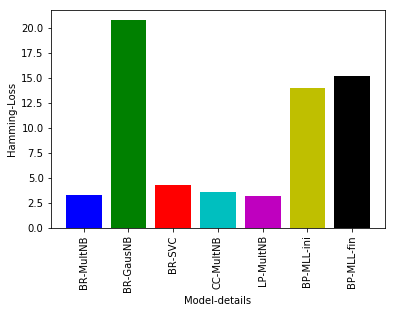

In [75]:
x = ['BR-MultNB','BR-GausNB','BR-SVC','CC-MultNB','LP-MultNB','BP-MLL-ini','BP-MLL-fin']
y = [3.27,20.74,4.26,3.56,3.17,13.96,15.158]
colors = itertools.cycle(['b', 'g', 'r', 'c', 'm', 'y', 'k'])
plt.ylabel('Hamming-Loss')
plt.xlabel('Model-details')
plt.xticks(rotation=90)
for i in range(len(y)):
    plt.bar(x[i], y[i], color=next(colors))
plt.show()

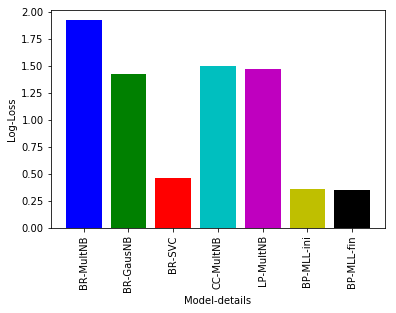

In [76]:
x = ['BR-MultNB','BR-GausNB','BR-SVC','CC-MultNB','LP-MultNB','BP-MLL-ini','BP-MLL-fin']
y = [1.92,1.422,0.46,1.5,1.47,0.36,0.35]
colors = itertools.cycle(['b', 'g', 'r', 'c', 'm', 'y', 'k'])
plt.ylabel('Log-Loss')
plt.xlabel('Model-details')
plt.xticks(rotation=90)
for i in range(len(y)):
    plt.bar(x[i], y[i], color=next(colors))
plt.show()

- While showing among the best problem transformation method models, hamming-loss was considered (this is because for BP-MLL neural network we had to round the final results to get the hamming-loss because of the output being multivalued probabilities)
- But while chosing among the best Adaptation Algorithm model, log loss was preferred.